In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_excel('/home/ataur/Downloads/Dataset_Assignment Clustering_K Means/EastWestAirlines.xlsx')

In [3]:
df.head(20)

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   East-West Airlines is trying to learn more about its customers.  Key issues are their  18 non-null     object
 1   Unnamed: 1                                                                             13 non-null     object
 2   Unnamed: 2                                                                             6 non-null      object
 3   Unnamed: 3                                                                             13 non-null     object
 4   Unnamed: 4                                                                             18 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


In [5]:
df.duplicated().sum()

3

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

# Converting Catagorical data to Numeric 

In [8]:
df1 = pd.get_dummies(df)

In [9]:
df1

,East-West Airlines is trying to learn more about its customers. Key issues are their_ note: miles bins:,East-West Airlines is trying to learn more about its customers. Key issues are their_(c) 2016 Galit Shmueli and Peter Bruce,East-West Airlines is trying to learn more about its customers. Key issues are their_Award?,East-West Airlines is trying to learn more about its customers. Key issues are their_Balance,East-West Airlines is trying to learn more about its customers. Key issues are their_Bonus_miles,East-West Airlines is trying to learn more about its customers. Key issues are their_Bonus_trans,East-West Airlines is trying to learn more about its customers. Key issues are their_Days_since_enroll,East-West Airlines is trying to learn more about its customers. Key issues are their_Field Name,East-West Airlines is trying to learn more about its customers. Key issues are their_Flight_miles_12mo,East-West Airlines is trying to learn more about its customers. Key issues are their_Flight_trans_12,...,Unnamed: 4_Number of flight miles in the past 12 months,Unnamed: 4_Number of flight transactions in the past 12 months,Unnamed: 4_Number of miles counted as qualifying for Topflight status,Unnamed: 4_Number of miles earned from non-flight bonus transactions in the past 12 months,Unnamed: 4_Number of miles earned with Rewards credit card in the past 12 months:,Unnamed: 4_Number of miles earned with Small Business credit card in the past 12 months:,Unnamed: 4_Number of miles earned with freq. flyer credit card in the past 12 months:,Unnamed: 4_Number of miles eligible for award travel,Unnamed: 4_Number of non-flight bonus transactions in the past 12 months,Unnamed: 4_Unique ID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Normalization

In [10]:
def norm_func(i):
    x = (i-i.min()) / (i.max()-i.min())
    return(x)

In [11]:
df_norm = norm_func(df1)

scree plot 

In [12]:
twss = []

In [13]:
k = list(range(2, 9))

In [14]:
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    twss.append(kmeans.inertia_)

In [15]:
twss

[47.76984126984127,
 39.54761904761905,
 32.96969696969697,
 28.33333333333334,
 25.000000000000007,
 23.000000000000007,
 21.0]

Text(0, 0.5, 'total_within_ss')

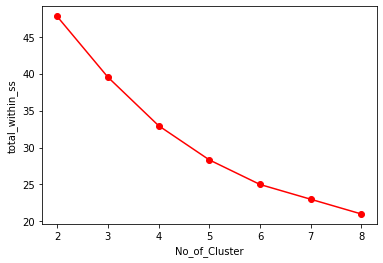

In [16]:
plt.plot(k, twss, 'ro-');plt.xlabel('No_of_Cluster');plt.ylabel('total_within_ss')

In [17]:
model = KMeans(n_clusters=3)
model.fit(df_norm)

KMeans(n_clusters=3)

In [18]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       1], dtype=int32)

In [19]:
mb = pd.Series(model.labels_)

In [20]:
df['Clust'] = mb

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 25
Data columns (total 6 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   East-West Airlines is trying to learn more about its customers.  Key issues are their  18 non-null     object 
 1   Unnamed: 1                                                                             13 non-null     object 
 2   Unnamed: 2                                                                             6 non-null      object 
 3   Unnamed: 3                                                                             13 non-null     object 
 4   Unnamed: 4                                                                             18 non-null     object 
 5   Clust                                                                            

In [22]:
df = df.iloc[:, [5,0,1,2,3,4]]

In [23]:
df

,Clust,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1.0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,1.0,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN
4,1.0,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,1.0,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
8,2.0,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,0.0,ID#,NUMBER,NaN,Telcom,Unique ID
10,0.0,Balance,NUMBER,8,Raw,Number of miles eligible for award travel
11,0.0,Qual_miles,NUMBER,8,Raw,Number of miles counted as qualifying for Topf...
12,1.0,cc1_miles,CHAR,1,Raw,Number of miles earned with freq. flyer credit...
